In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import skew, kurtosis, norm
#from sklearn.cluster import DBSCAN, HDBSCAN
#from sklearn.preprocessing import quantile_transform
import blimpy as bl
import setigen as stg
from astropy import units as u
import psutil
%matplotlib inline

In [3]:
dats = glob.glob('/datax/scratch/benjb/injections/*_inserted.dat')
h5s = glob.glob('/datax/scratch/benjb/injections/*_inserted.h5')

In [4]:
freqs = []
drifts = []
snrs = []

for dat in dats:
    df = pd.read_table(dat, sep='\s+', 
                  names=['Top_Hit_#','Drift_Rate','SNR',
                         'Uncorrected_Frequency','Corrected_Frequency',
                         'Index', 'freq_start', 'freq_end', 'SEFD', 
                         'SEFD_freq', 'Coarse_Channel_Number',
                         'Full_number_of_hits'], skiprows=9)
    
    freq = df['Uncorrected_Frequency'].values[-1]
    drift = df['Drift_Rate'].values[-1]
    snr = df['SNR'].values[-1]
    
    freqs.append(freq)
    drifts.append(drift)
    snrs.append(snr)

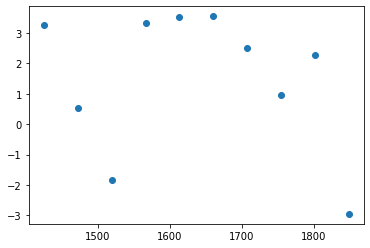

In [7]:
plt.scatter(freqs, drifts)
plt.show()

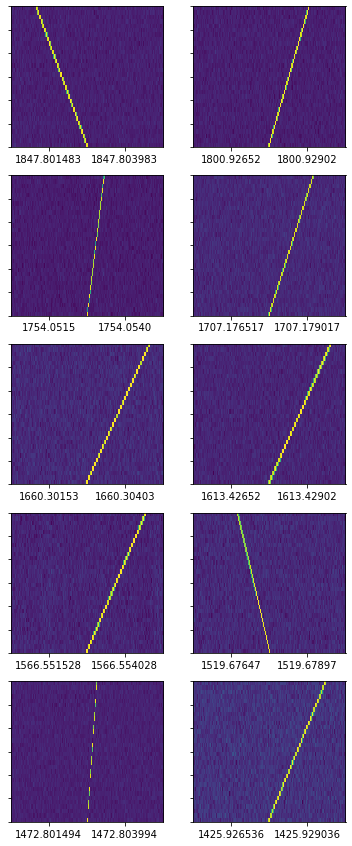

In [34]:
hbw = 0.00500/2

fig, axs = plt.subplots(5, 2, figsize=(6, 15))

for i in range(5):
    for j in range(2):
    
        file_path = h5s[2*i+j]

        freq = freqs[2*i+j]

        fb = bl.Waterfall(file_path, f_start=freq-hbw, f_stop=freq+hbw)
        #fb.plot_waterfall()

        ff, data = fb.grab_data()
        axs[i,j].imshow(np.log10(data), aspect='auto', interpolation='none', extent=[np.max(ff), np.min(ff), 0, 600], origin='lower')
        axs[i,j].invert_xaxis()
        axs[i,j].set_xticks([np.median(ff)-hbw/2, np.median(ff)+hbw/2])
        axs[i,j].set_yticklabels([])
plt.show()
#fb.plot_waterfall()

In [37]:
file_path = h5s[8]

freq = freqs[8]

fb = bl.Waterfall(file_path)
fb.info()


--- File Info ---
DIMENSION_LABELS : [b'time' b'feed_id' b'frequency']
        az_start :                              0.0
       data_type :                                1
            fch1 :           1475.0000000931323 MHz
            foff :      -2.7939677238464355e-06 MHz
      machine_id :                               20
           nbits :                               32
          nchans :                          1048576
            nifs :                                1
     source_name :                           DDO210
         src_dej :                      -12:50:54.6
         src_raj :                     20:46:51.672
    telescope_id :                                6
           tsamp :                     18.253611008
   tstart (ISOT) :          2018-07-07T08:49:26.000
    tstart (MJD) :                58306.36766203704
        za_start :                              0.0

Num ints in file :                               32
      File shape :                 (32, 1, 